In [1]:
!pip install transformers datasets pandas scikit-learn seaborn matplotlib

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.2 MB/s eta 0:00:00


In [28]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/SQ_train.csv')

# Display the first few rows of the dataframe
print(df.head())

   Index                     Title  \
0      1  University_of_Notre_Dame   
1      2  University_of_Notre_Dame   
2      3  University_of_Notre_Dame   
3      4  University_of_Notre_Dame   
4      5  University_of_Notre_Dame   

                                             Context  \
0  As at most other universities, Notre Dame's st...   
1  As at most other universities, Notre Dame's st...   
2  As at most other universities, Notre Dame's st...   
3  As at most other universities, Notre Dame's st...   
4  As at most other universities, Notre Dame's st...   

                                            Question     Answer_Text  \
0  When did the Scholastic Magazine of Notre dame...  September 1876   
1   How often is Notre Dame's the Juggler published?           twice   
2  What is the daily student paper at Notre Dame ...    The Observer   
3  How many student news papers are found at Notr...           three   
4  In what year did the student paper Common Sens...            1987   

 

In [29]:
# Get basic information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Get descriptive statistics
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11299 entries, 0 to 11298
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Index         11299 non-null  int64 
 1   Title         11299 non-null  object
 2   Context       11299 non-null  object
 3   Question      11299 non-null  object
 4   Answer_Text   11299 non-null  object
 5   Answer_Start  11299 non-null  int64 
 6   Domain        11299 non-null  object
 7   ID            11299 non-null  object
dtypes: int64(2), object(6)
memory usage: 706.3+ KB
None
Index           0
Title           0
Context         0
Question        0
Answer_Text     0
Answer_Start    0
Domain          0
ID              0
dtype: int64
             Index  Answer_Start
count  11299.00000  11299.000000
mean    5650.00000    347.903974
std     3261.88468    289.862167
min        1.00000      0.000000
25%     2825.50000    120.000000
50%     5650.00000    285.000000
75%     8474.50000    503.0

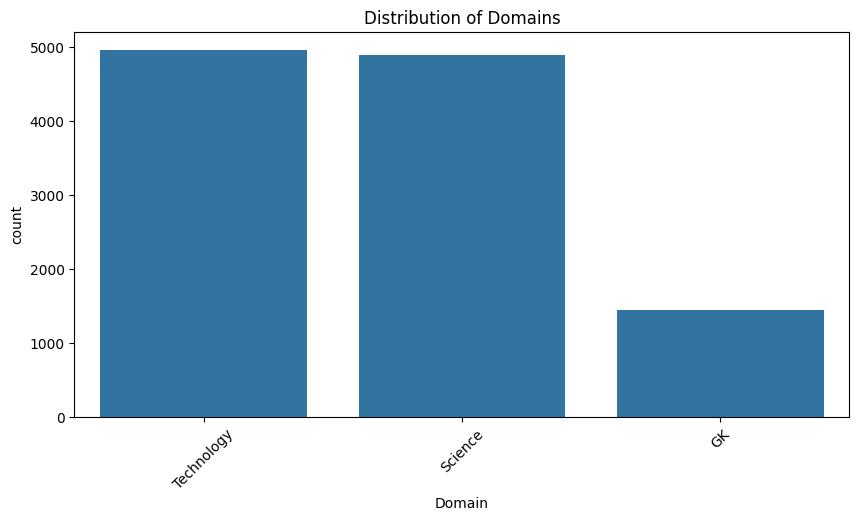

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the 'Domain' field
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Domain', order=df['Domain'].value_counts().index)
plt.title('Distribution of Domains')
plt.xticks(rotation=45)
plt.show()

In [32]:
# Create a new DataFrame to hold the lengths of the text fields
text_lengths = df[['Title', 'Context', 'Question', 'Answer_Text']].applymap(lambda x: len(str(x)))
text_lengths.describe()

<ipython-input-32-42e5c3c40930>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  text_lengths = df[['Title', 'Context', 'Question', 'Answer_Text']].applymap(lambda x: len(str(x)))


,Title,Context,Question,Answer_Text
count,11299.000000,11299.000000,11299.000000,11299.000000
mean,14.101159,818.733959,61.272236,21.520843
std,8.194482,333.358954,21.835362,21.967117
min,3.000000,151.000000,1.000000,1.000000
25%,8.000000,594.000000,46.000000,8.000000
50%,12.000000,746.000000,59.000000,15.000000
75%,20.000000,981.000000,74.000000,26.000000
max,59.000000,3355.000000,270.000000,239.000000


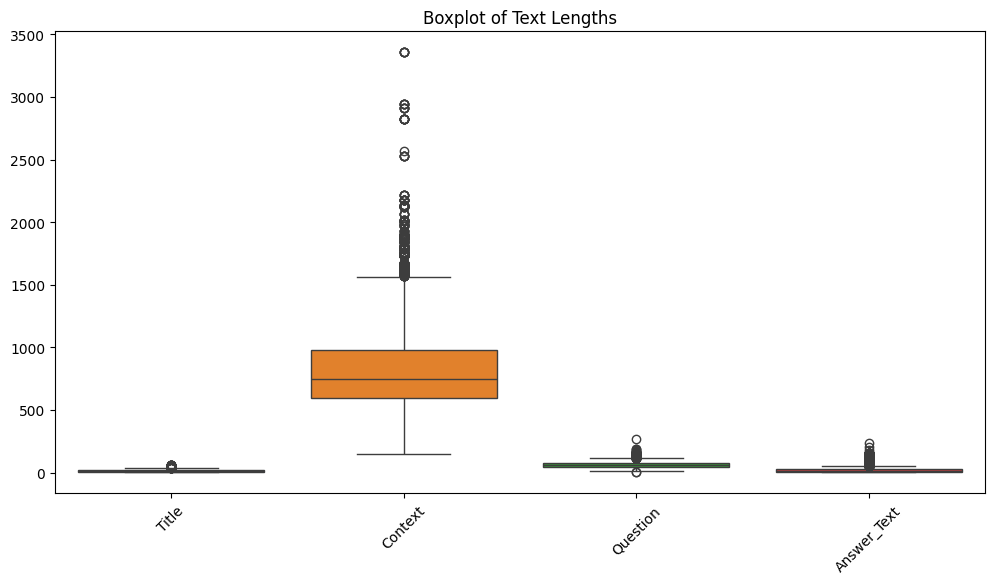

In [33]:
# Plot the distributions of the lengths
plt.figure(figsize=(12, 6))
sns.boxplot(data=text_lengths)
plt.title('Boxplot of Text Lengths')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32227 (\N{CJK UNIFIED IDEOGRAPH-7DE3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36215 (\N{CJK UNIFIED IDEOGRAPH-8D77}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


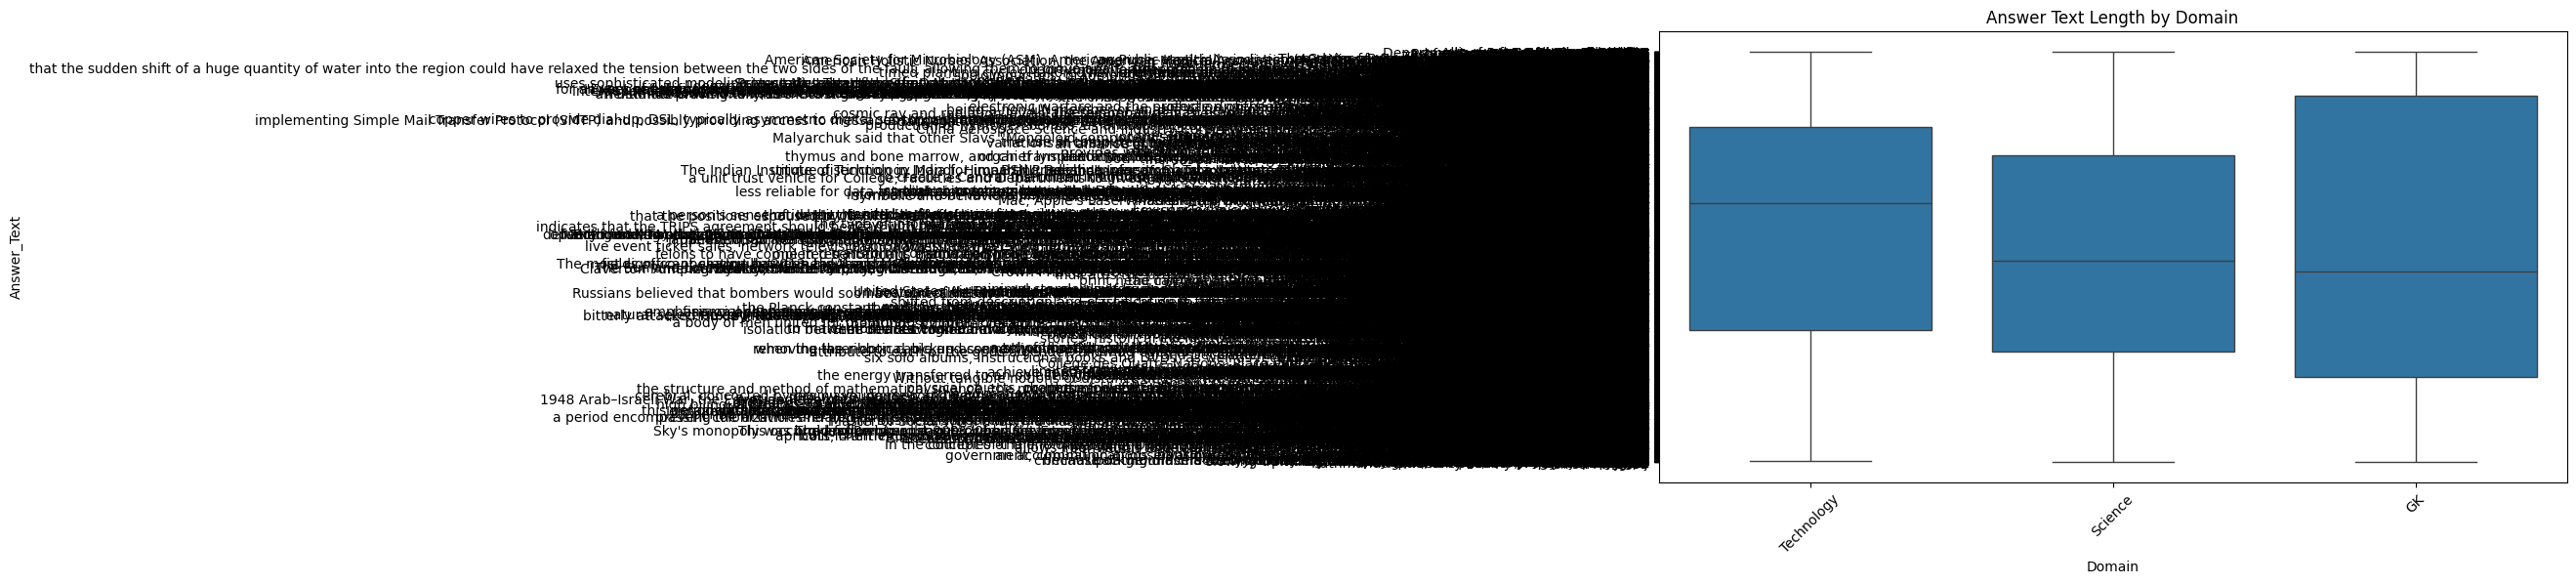

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Domain', y='Answer_Text', order=df['Domain'].value_counts().index)
plt.title('Answer Text Length by Domain')
plt.xticks(rotation=45)
plt.show()

In [24]:
pip install wordcloud

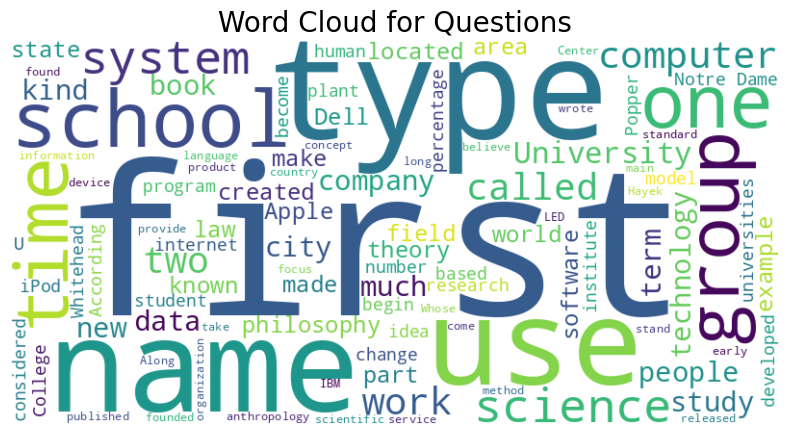

In [50]:
from wordcloud import WordCloud,STOPWORDS

# Add 'used' and 'many' to the stopwords list
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['used', 'many','year'])

# Combine all questions into a single string
text = ' '.join(df['Question'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100,stopwords=custom_stopwords).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud for Questions', fontsize=20)
plt.show()


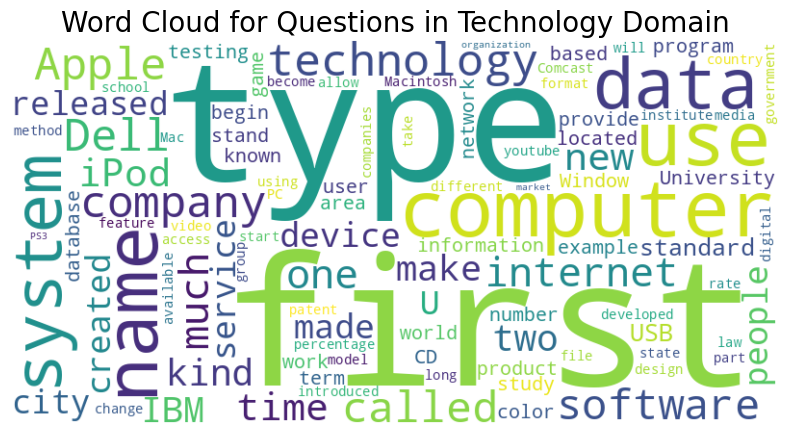

In [48]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

# Add 'used' and 'many' to the stopwords list
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['used', 'many','year'])

# Filter questions by Science domain
filtered_df = df[df['Domain'] == 'Technology']

# Combine all questions from the filtered domain into a single string
text = ' '.join(filtered_df['Question'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100,stopwords=custom_stopwords).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud for Questions in Technology Domain', fontsize=20)
plt.show()

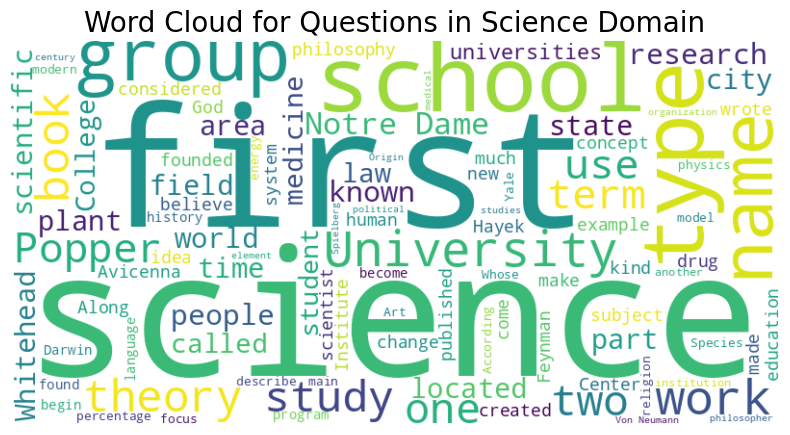

In [45]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

# Add 'used' and 'many' to the stopwords list
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['used', 'many','year'])

# Filter questions by Science domain
filtered_df = df[df['Domain'] == 'Science']

# Combine all questions from the filtered domain into a single string
text = ' '.join(filtered_df['Question'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100,stopwords=custom_stopwords).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud for Questions in Science Domain', fontsize=20)
plt.show()

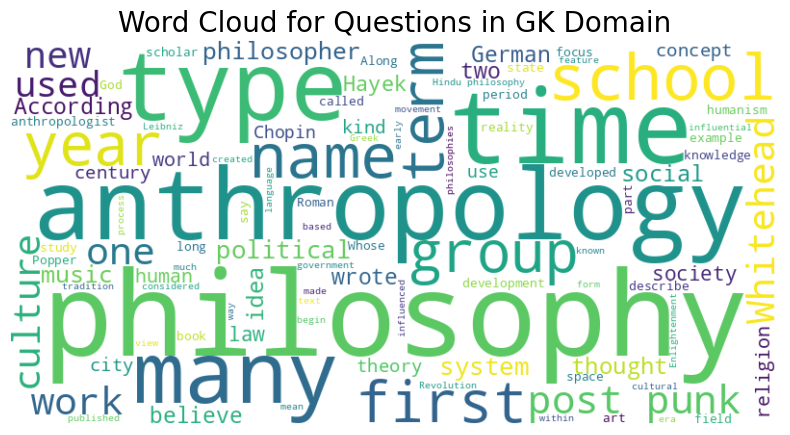

In [40]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

# Add 'used' and 'many' to the stopwords list
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['used', 'many','year'])

# Filter questions by GK domain
filtered_df = df[df['Domain'] == 'GK']

# Combine all questions from the filtered domain into a single string
text = ' '.join(filtered_df['Question'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100,stopwords=custom_stopwords).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud for Questions in GK Domain', fontsize=20)
plt.show()